In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [5]:
#Water quality describes the condition of the water, including chemical, physical, and biological characteristics, usually with respect to its suitability for a particular purpose such as drinking or swimming.

In [6]:
df = pd.read_csv("D:\water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
df.shape

(3276, 10)

In [8]:
#统计缺失值
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
#删去缺失值
df= df.dropna()

In [22]:
df['Potability'].replace({0:'Not potable', 1:'Potable'}, inplace=True)
df_unpotable = df[df['Potability']=='Not potable']
df_potable = df[df['Potability']=='Potable']

array([<AxesSubplot:ylabel='Potability'>], dtype=object)

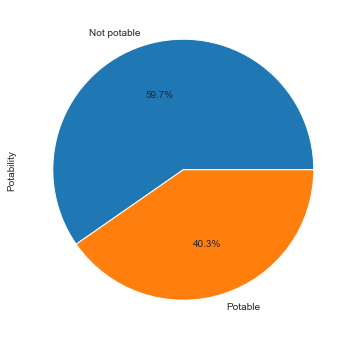

In [26]:
df.Potability.value_counts().plot(kind ='pie',subplots=True,autopct='%1.1f%%',labeldistance=1.1, figsize=(6,6))

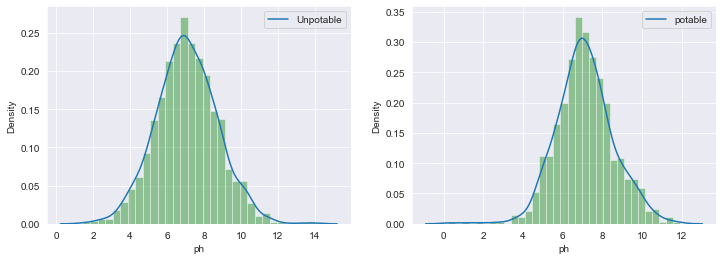

In [30]:
plt.figure(figsize=(12,4))
sns.set_style('darkgrid')

plt.subplot(1,2,1)
sns.distplot(df_unpotable['ph'],hist_kws={'color':'green','label':'hist'})
plt.legend(['Unpotable'])

plt.subplot(1,2,2)
sns.distplot(df_potable['ph'],hist_kws={'color':'green','label':'hist'})
plt.legend(['potable'])


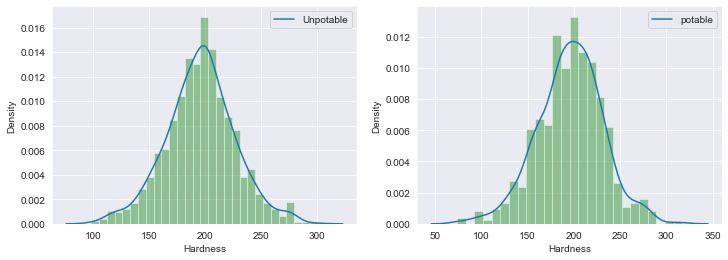

In [34]:
plt.figure(figsize=(12,4))
sns.set_style('darkgrid')

plt.subplot(1,2,1)
sns.distplot(df_unpotable['Hardness'],hist_kws={'color':'green','label':'hist'})
plt.legend(['Unpotable'])

plt.subplot(1,2,2)
sns.distplot(df_potable['Hardness'],hist_kws={'color':'green','label':'hist'})
plt.legend(['potable'])

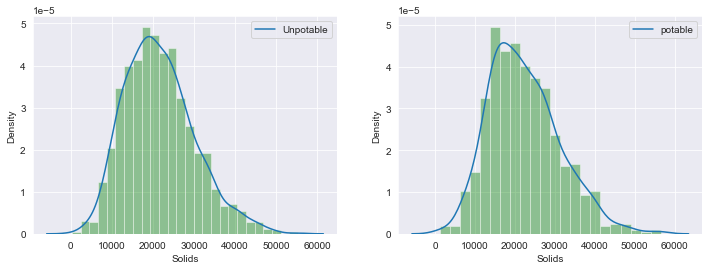

In [38]:
plt.figure(figsize=(12,4))
sns.set_style('darkgrid')

plt.subplot(1,2,1)
sns.distplot(df_unpotable['Solids'],hist_kws={'color':'green','label':'hist'})
plt.legend(['Unpotable'])

plt.subplot(1,2,2)
sns.distplot(df_potable['Solids'],hist_kws={'color':'green','label':'hist'})
plt.legend(['potable'])

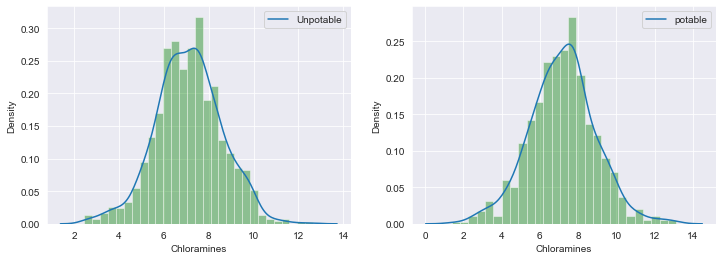

In [42]:
plt.figure(figsize=(12,4))
sns.set_style('darkgrid')

plt.subplot(1,2,1)
sns.distplot(df_unpotable['Chloramines'],hist_kws={'color':'green','label':'hist'})
plt.legend(['Unpotable'])

plt.subplot(1,2,2)
sns.distplot(df_potable['Chloramines'],hist_kws={'color':'green','label':'hist'})
plt.legend(['potable'])

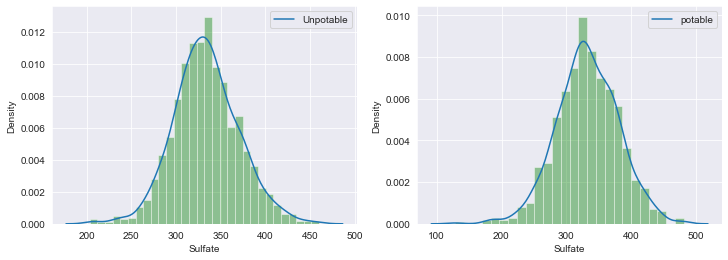

In [46]:
plt.figure(figsize=(12,4))
sns.set_style('darkgrid')

plt.subplot(1,2,1)
sns.distplot(df_unpotable['Sulfate'],hist_kws={'color':'green','label':'hist'})
plt.legend(['Unpotable'])

plt.subplot(1,2,2)
sns.distplot(df_potable['Sulfate'],hist_kws={'color':'green','label':'hist'})
plt.legend(['potable'])

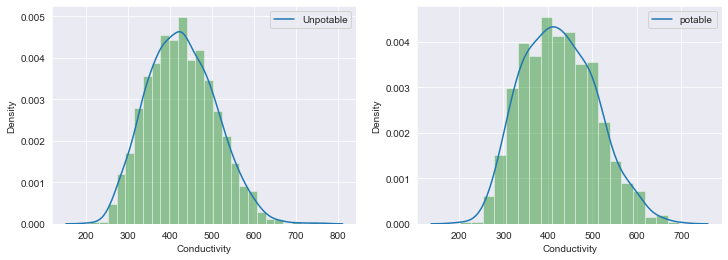

In [50]:
plt.figure(figsize=(12,4))
sns.set_style('darkgrid')

plt.subplot(1,2,1)
sns.distplot(df_unpotable['Conductivity'],hist_kws={'color':'green','label':'hist'})
plt.legend(['Unpotable'])

plt.subplot(1,2,2)
sns.distplot(df_potable['Conductivity'],hist_kws={'color':'green','label':'hist'})
plt.legend(['potable'])

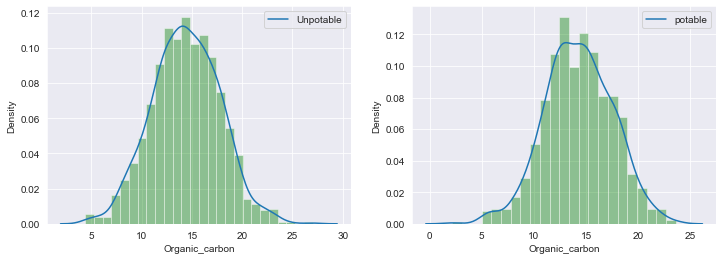

In [54]:
plt.figure(figsize=(12,4))
sns.set_style('darkgrid')

plt.subplot(1,2,1)
sns.distplot(df_unpotable['Organic_carbon'],hist_kws={'color':'green','label':'hist'})
plt.legend(['Unpotable'])

plt.subplot(1,2,2)
sns.distplot(df_potable['Organic_carbon'],hist_kws={'color':'green','label':'hist'})
plt.legend(['potable'])


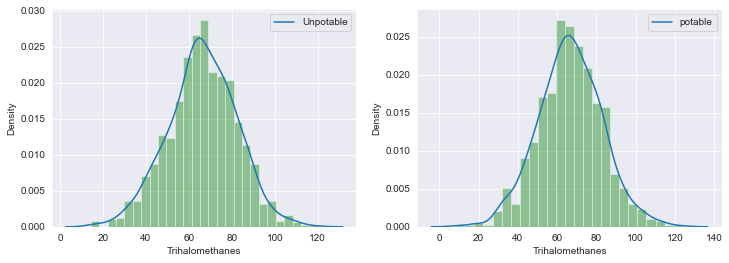

In [58]:
plt.figure(figsize=(12,4))
sns.set_style('darkgrid')

plt.subplot(1,2,1)
sns.distplot(df_unpotable['Trihalomethanes'],hist_kws={'color':'green','label':'hist'})
plt.legend(['Unpotable'])

plt.subplot(1,2,2)
sns.distplot(df_potable['Trihalomethanes'],hist_kws={'color':'green','label':'hist'})
plt.legend(['potable'])


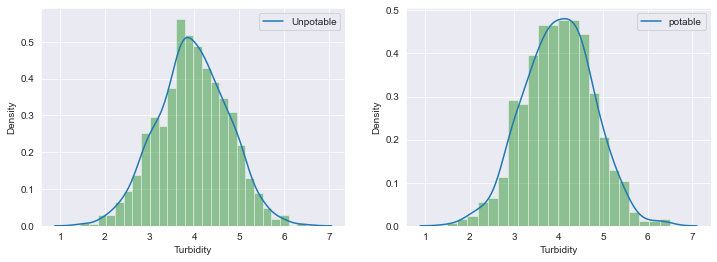

In [62]:
plt.figure(figsize=(12,4))
sns.set_style('darkgrid')

plt.subplot(1,2,1)
sns.distplot(df_unpotable['Turbidity'],hist_kws={'color':'green','label':'hist'})
plt.legend(['Unpotable'])

plt.subplot(1,2,2)
sns.distplot(df_potable['Turbidity'],hist_kws={'color':'green','label':'hist'})
plt.legend(['potable'])


<AxesSubplot:>

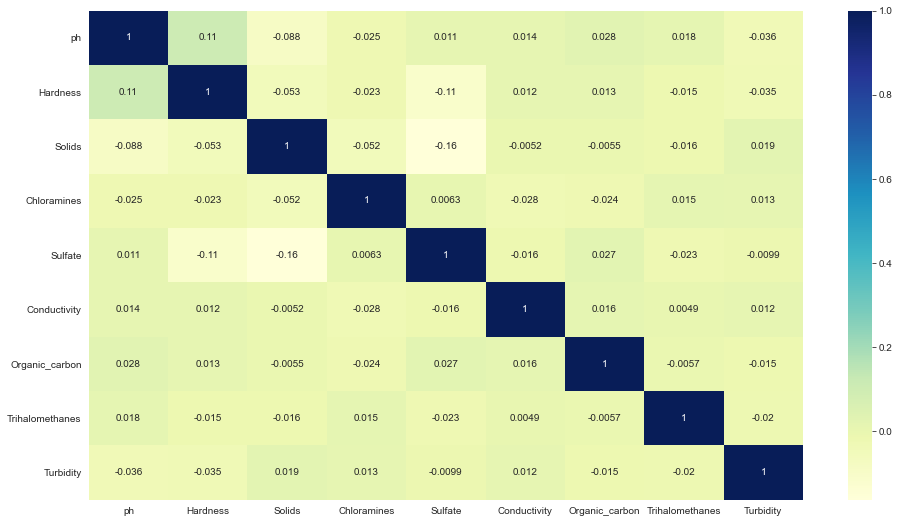

In [66]:
plt.figure(figsize = (16,9))
sns.heatmap(df.corr(),cmap ="YlGnBu", annot = True)

In [78]:
#删去结果列
X = df.drop(['Potability'], axis = 1)
y = df['Potability']
#划分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [100]:
#随机森林
RFC = RandomForestClassifier(random_state=0)
RFC.fit(X_train,y_train)

print("准确率：",RFC.score(X_test,y_test))



准确率： 0.6771523178807947


In [106]:
#逻辑回归
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)
print("准确率",lr.score(X_test,y_test))
print("回归系数：",lr.coef_)
print("截距：",lr.intercept_)



准确率 0.6208609271523179
回归系数： [[-2.01320237e-05 -4.79356477e-04  1.23815244e-05  2.44731721e-05
  -3.09386982e-04 -9.56028385e-04 -9.32867733e-05 -1.31225572e-04
   2.47251159e-05]]
截距： [-3.25342336e-06]
